In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)

1.11.0+cu113


# Pytorch: An automatic differentiation tool

`Pytorch`를 활용하면 복잡한 함수의 미분을 손쉽게 + 효율적으로 계산할 수 있습니다!
`Pytorch`를 활용해서 복잡한 심층 신경망을 훈련할 때, 오차함수에 대한 파라미터의 편미분치를 계산을 손쉽게 수행할수 있습니다!

## Pytorch 첫만남

우리에게 아래와 같은 간단한 선형식이 주어져있다고 생각해볼까요?
$$ y = wx $$ 

그러면 $\frac{\partial y}{\partial w}$ 을 어떻게 계산 할 수 있을까요?
일단 직접 미분을 해보면$\frac{\partial y}{\partial w} = x$ 이 되니, 간단한
예제에서 `pytorch`로 해당 값을 계산하는 방법을 알아보도록 합시다!

In [3]:
# 랭크1 / 사이즈1 이며 값은 1*2 인 pytorch tensor를 하나 만듭니다.
x = torch.ones(1) * 2

# 랭크1 / 사이즈1 이며 값은 1 인 pytorch tensor를 하나 만듭니다.
w = torch.ones(1, requires_grad = True)

y = w * x

In [5]:
print(x.shape, w.shape, y.shape)

torch.Size([1]) torch.Size([1]) torch.Size([1])


In [6]:
print(x)
print(w)
print(y)

tensor([2.])
tensor([1.], requires_grad=True)
tensor([2.], grad_fn=<MulBackward0>)


## 편미분 계산하기!

pytorch에서는 미분값을 계산하고 싶은 텐서에 `.backward()` 를 붙여주는 것으로, 해당 텐서 계산에 연결 되어있는 텐서 중 `gradient`를 계산해야하는 텐서(들)에 대한 편미분치들을 계산할수 있습니다. `requires_grad=True`를 통해서 어떤 텐서에 미분값을 계산할지 할당해줄 수 있습니다.

In [7]:
y.backward()

## 편미분값 확인하기!

`텐서.grad` 를 활용해서 특정 텐서의 gradient 값을 확인해볼 수 있습니다. 한번 `w.grad`를 활용해서 `y` 에 대한 `w`의 편미분값을 확인해볼까요?

In [8]:
w.grad

tensor([2.])

## 그러면 requires_grad = False 인 경우는?

In [10]:
# It returns None.
x.grad

## `torch.nn`, Neural Network 패키지

`pytorch`에는 이미 다양한 neural network들의 모듈들을 구현해 놓았습니다. 그 중에 가장 간단하지만 정말 자주 쓰이는 `nn.Linear` 에 대해 알아보면서 `pytorch`의 `nn.Module`에 대해서 알아보도록 합시다.

## `nn.Linear` 돌아보기

`nn.Linear` 은 앞서 배운 선형회귀 및 다층 퍼셉트론 모델의 한 층에 해당하는 파라미터 $w$, $b$ 를 가지고 있습니다. 예시로 입력의 dimension 이 10이고 출력의 dimension 이 1인 `nn.Linear` 모듈을 만들어 봅시다!

In [11]:
lin = nn.Linear(in_features = 10, out_features = 1)

In [12]:
for p in lin.parameters():
    print(p)
    # nn.linear basically considers it as the batch size..
    # Thus, the first value (dimension) of its shape is shown..
    # The first value, 1, indicates the first value of a given batch.
    print(p.shape)
    print('\n')

Parameter containing:
tensor([[-0.2067,  0.1226,  0.1845, -0.1493,  0.1830,  0.0965, -0.0903,  0.2052,
         -0.0689, -0.1964]], requires_grad=True)
torch.Size([1, 10])


Parameter containing:
tensor([-0.2505], requires_grad=True)
torch.Size([1])




## `Linear` 모듈로 $y = Wx+b$ 계산하기

선형회귀식도 그랬지만, 다층 퍼셉트론 모델도 하나의 레이어는 아래의 수식을 계산했던 것을 기억하시죠?
$$y = Wx+b$$

`nn.Linear`를 활용해서 저 수식을 계산해볼까요?

검산을 쉽게 하기 위해서 W의 값은 모두 1.0 으로 b 는 5.0 으로 만들어두겠습니다.

In [13]:
lin.weight.data = torch.ones_like(lin.weight.data)
lin.bias.data = torch.ones_like(lin.bias.data) * 5.0

for p in lin.parameters():
    print(p)
    print(p.shape)
    print('\n')

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)
torch.Size([1, 10])


Parameter containing:
tensor([5.], requires_grad=True)
torch.Size([1])




In [14]:
x = torch.ones(3, 10) # rank2 tensor를 만듭니다. : mini batch size = 3
y_hat = lin(x)

In [16]:
x

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [15]:
x.shape

torch.Size([3, 10])

In [17]:
print(y_hat.shape)
print(y_hat)

torch.Size([3, 1])
tensor([[15.],
        [15.],
        [15.]], grad_fn=<AddmmBackward0>)


## 지금 무슨일이 일어난거죠?

>Q1. 왜 Rank 2 tensor 를 입력으로 사용하나요? <br>
>A1. 파이토치의 `nn` 에 정의되어있는 클래스들은 입력의 가장 첫번째 디멘젼을 `배치 사이즈`로 해석합니다. 

>Q2. lin(x) 는 도대체 무엇인가요? <br>
>A2. 파이썬에 익숙하신 분들은 `object()` 는 `object.__call__()`에 정의되어있는 함수를 실행시키신다는 것을 아실텐데요. 파이토치의 `nn.Module`은 `__call__()`을 오버라이드하는 함수인 `forward()`를 구현하는 것을 __권장__ 하고 있습니다. 일반적으로, `forward()`안에서 실제로 파라미터와 인풋을 가지고 특정 레이어의 연산과정을 구현하게 됩니다.

여러가지 이유가 있겠지만, 파이토치가 내부적으로 foward() 의 실행의 전/후로 사용자 친화적인 환경을 제공하기 위해서 추가적인 작업들을 해줍니다. 이 부분은 다음 실습에서 다층 퍼셉트론 모델을 만들면서 조금 더 자세히 설명해볼게요!

## Pytorch 로 간단히! 선형회귀 구현하기

저번 실습에서 numpy 로 구현했던 Linear regression 모델을 다시 한번 파이토치로 구현해볼까요? <br>
몇 줄이면 끝날 정도로 간단합니다 :)

In [18]:
def generate_samples(n_samples: int, 
                     w: float = 1.0, 
                     b: float = 0.5,
                     x_range = [-1.0, 1.0]):
    
    xs = np.random.uniform(low = x_range[0],
                           high = x_range[1],
                           size = n_samples)
    ys = w * xs + b
    
    # Numpy에서는 일반적으로 64-bit float으로 숫자를 만들어내지만,
    # PyTorch에서는 32-bit float를 취급하기 때문에 float()를 통해
    # 32-bit로 바꾸어줄 것
    xs = torch.tensor(xs).view(-1, 1).float() # 파이토치 nn.Module 은 배치가 첫 디멘젼!
    ys = torch.tensor(ys).view(-1, 1).float()
    return xs, ys

In [19]:
w = 1.0
b = 0.5
xs, ys = generate_samples(30, w = w, b = b)

In [20]:
lin_model = nn.Linear(in_features = 1, out_features = 1) # lim_model 생성

for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[0.9193]], requires_grad=True)
None
Parameter containing:
tensor([-0.6617], requires_grad=True)
None


In [21]:
ys_hat = lin_model(xs) # lin_model 로 예측하기

## Loss 함수는? MSE!

`pytorch`에서는 자주 쓰이는 loss 함수들에 대해서도 미리 구현을 해두었습니다.
이번 실습에서는 __numpy로 선형회귀 모델 만들기__ 에서 사용됐던 MSE 를 오차함수로 사용해볼까요?

In [22]:
criteria = nn.MSELoss()
loss = criteria(ys_hat, ys)

## 경사하강법을 활용해서 파라미터 업데이트하기!

`pytorch`는 여러분들을 위해서 다양한 optimizer들을 구현해 두었습니다. 일단은 가장 간단한 stochastic gradient descent (SGD)를 활용해 볼까요? optimizer에 따라서 다양한 인자들을 활용하지만 기본적으로 `params` 와 `lr`을 지정해주면 나머지는 optimizer 마다 잘되는 것으로 알려진 인자들로 optimizer을 손쉽게 생성할수 있습니다.

In [23]:
opt = torch.optim.SGD(params = lin_model.parameters(), lr = 0.01)

## 잊지마세요! opt.zero_grad()

`pytorch`로 편미분을 계산하기전에, 꼭 `opt.zero_grad()` 함수를 이용해서 편미분 계산이 필요한 텐서들의 편미분값을 초기화 해주는 것을 권장드립니다.

In [24]:
opt.zero_grad()
for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[0.9193]], requires_grad=True)
None
Parameter containing:
tensor([-0.6617], requires_grad=True)
None


In [26]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [27]:
opt.step()
for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[0.9223]], requires_grad=True)
tensor([[-0.2991]])
Parameter containing:
tensor([-0.6383], requires_grad=True)
tensor([-2.3390])


## 경사하강법을 활용해서 최적 파라미터를 찾아봅시다!

In [28]:
def run_sgd(n_steps: int = 1000,
            report_every: int = 100,
            verbose = True):
    
    lin_model = nn.Linear(in_features = 1, out_features = 1)
    opt = torch.optim.SGD(params = lin_model.parameters(), lr = 0.01)
    sgd_losses = []

    for i in range(n_steps):
        ys_hat = lin_model(xs)
        loss = criteria(ys_hat, ys)
        opt.zero_grad()
        loss.backward()
        opt.step()

        if i % report_every == 0:
            if verbose:
                print('\n')
                print("The {}th update: {}".format(i, loss))
                for p in lin_model.parameters():
                    print(p)
            sgd_losses.append(loss.log10().detach().numpy())
    return sgd_losses

In [29]:
_ = run_sgd()



The 0th update: 0.6989063620567322
Parameter containing:
tensor([[-0.1490]], requires_grad=True)
Parameter containing:
tensor([0.8993], requires_grad=True)


The 100th update: 0.10923358798027039
Parameter containing:
tensor([[0.5241]], requires_grad=True)
Parameter containing:
tensor([0.6086], requires_grad=True)


The 200th update: 0.017912648618221283
Parameter containing:
tensor([[0.8055]], requires_grad=True)
Parameter containing:
tensor([0.5373], requires_grad=True)


The 300th update: 0.0029519638046622276
Parameter containing:
tensor([[0.9209]], requires_grad=True)
Parameter containing:
tensor([0.5143], requires_grad=True)


The 400th update: 0.00048671013792045414
Parameter containing:
tensor([[0.9679]], requires_grad=True)
Parameter containing:
tensor([0.5057], requires_grad=True)


The 500th update: 8.025319402804598e-05
Parameter containing:
tensor([[0.9869]], requires_grad=True)
Parameter containing:
tensor([0.5023], requires_grad=True)


The 600th update: 1.323182823398

In [30]:
_

[array(-0.15558101, dtype=float32),
 array(-0.9616438, dtype=float32),
 array(-1.7468402, dtype=float32),
 array(-2.5298889, dtype=float32),
 array(-3.3127296, dtype=float32),
 array(-4.0955377, dtype=float32),
 array(-4.8783803, dtype=float32),
 array(-5.6612267, dtype=float32),
 array(-6.443986, dtype=float32),
 array(-7.2268233, dtype=float32)]

## 다른 Optimizer도 사용해볼까요?

수업시간에 배웠던 Adam 으로 최적화를 하면 어떤결과가 나올까요?

In [31]:
def run_adam(n_steps: int = 1000,
             report_every: int = 100,
             verbose = True):
    
    lin_model = nn.Linear(in_features = 1, out_features = 1)
    opt = torch.optim.Adam(params = lin_model.parameters(), lr = 0.01)
    adam_losses = []

    for i in range(n_steps):
        ys_hat = lin_model(xs)
        loss = criteria(ys_hat, ys)
        opt.zero_grad()
        loss.backward()
        opt.step()

        if i % report_every == 0:
            if verbose:
                print('\n')
                print("The {}th update: {}".format(i,loss))
                for p in lin_model.parameters():
                    print(p)
            adam_losses.append(loss.log10().detach().numpy())
    
    
    
    return adam_losses

In [32]:
_ = run_adam()



The 0th update: 0.45999854803085327
Parameter containing:
tensor([[0.0263]], requires_grad=True)
Parameter containing:
tensor([0.7211], requires_grad=True)


The 100th update: 0.020160624757409096
Parameter containing:
tensor([[0.7942]], requires_grad=True)
Parameter containing:
tensor([0.5210], requires_grad=True)


The 200th update: 7.503338565584272e-05
Parameter containing:
tensor([[0.9876]], requires_grad=True)
Parameter containing:
tensor([0.5013], requires_grad=True)


The 300th update: 4.51362280884382e-09
Parameter containing:
tensor([[0.9999]], requires_grad=True)
Parameter containing:
tensor([0.5000], requires_grad=True)


The 400th update: 4.2361115158186247e-13
Parameter containing:
tensor([[1.0000]], requires_grad=True)
Parameter containing:
tensor([0.5000], requires_grad=True)


The 500th update: 4.2361115158186247e-13
Parameter containing:
tensor([[1.0000]], requires_grad=True)
Parameter containing:
tensor([0.5000], requires_grad=True)


The 600th update: 4.2361115158

In [33]:
_

[array(-0.33724353, dtype=float32),
 array(-1.695496, dtype=float32),
 array(-4.1247454, dtype=float32),
 array(-8.345475, dtype=float32),
 array(-12.373033, dtype=float32),
 array(-12.373033, dtype=float32),
 array(-12.373033, dtype=float32),
 array(-12.373033, dtype=float32),
 array(-12.373033, dtype=float32),
 array(-12.493659, dtype=float32)]

## 좀 더 상세하게 비교해볼까요?

`pytorch`에서 `nn.Linear`를 비롯한 많은 모듈들은 특별한 경우가 아닌이상,
모듈내에 파라미터가 임의의 값으로 __잘!__ 초기화 됩니다. 

> "잘!" 에 대해서는 수업에서 다루지 않았지만, 확실히 현대 딥러닝이 잘 작동하게 하는 중요한 요소중에 하나입니다. Parameter initialization 이라고 부르는 기법들이며, 대부분의 `pytorch` 모듈들은 각각의 모듈에 따라서 일반적으로 잘 작동하는것으로 알려져있는 방식으로 파라미터들이 초기화 되게 코딩되어 있습니다.

그래서 매 번 모듈을 생성할때마다 파라미터의 초기값이 달라지게 됩니다. 이번에는 조금 공정한 비교를 위해서 위에서 했던 실험을 여러번 반복해서 평균적으로도 Adam이 좋은지 확인해볼까요?

In [34]:
sgd_losses = [run_sgd(verbose = False) for _ in range(50)]
sgd_losses = np.stack(sgd_losses)
sgd_loss_mean = np.mean(sgd_losses, axis = 0)
sgd_loss_std = np.std(sgd_losses, axis = -0)

In [35]:
adam_losses = [run_adam(verbose = False) for _ in range(50)]
adam_losses = np.stack(adam_losses)
adam_loss_mean = np.mean(adam_losses, axis = 0)
adam_loss_std = np.std(adam_losses, axis = -0)

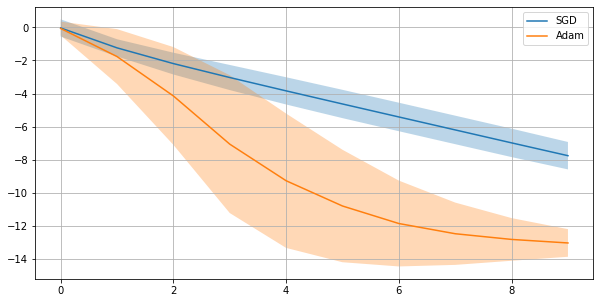

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.grid()
ax.fill_between(x = range(sgd_loss_mean.shape[0]),
                y1 = sgd_loss_mean + sgd_loss_std,
                y2 = sgd_loss_mean - sgd_loss_std,
                alpha = 0.3)
ax.plot(sgd_loss_mean, label = 'SGD')
ax.fill_between(x = range(adam_loss_mean.shape[0]),
                y1 = adam_loss_mean + adam_loss_std,
                y2 = adam_loss_mean - adam_loss_std,
                alpha = 0.3)
ax.plot(adam_loss_mean, label = 'Adam')
ax.legend()